In [398]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [399]:
loan_df = pd.read_csv('/home/student/application_train.csv', nrows=10000)

In [400]:
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


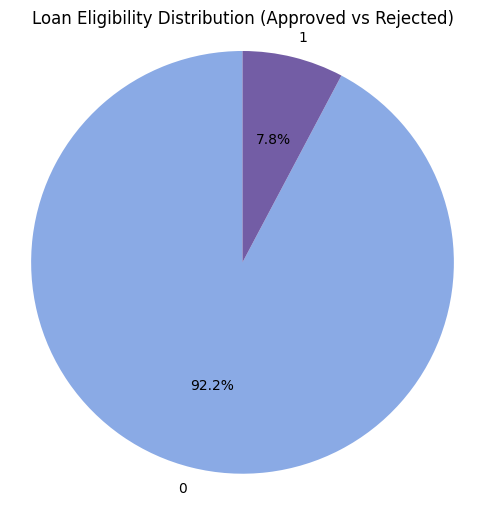

In [401]:
# Count the number of positive and negative sentiments
eligibility_counts = loan_df['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(eligibility_counts, labels=eligibility_counts.index, autopct='%1.1f%%', colors=['#8AAAE5', '#735DA5'], startangle=90)
plt.title('Loan Eligibility Distribution (Approved vs Rejected)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [402]:
loan_df = loan_df.drop(['SK_ID_CURR','OCCUPATION_TYPE'], axis=1)

In [403]:
loan_df['TARGET'] = loan_df['TARGET'].astype(str).str.strip()  # Convert to str if needed
loan_df['NAME_CONTRACT_TYPE'] = loan_df['NAME_CONTRACT_TYPE'].str.strip()
loan_df['CODE_GENDER'] = loan_df['CODE_GENDER'].str.strip()
loan_df['FLAG_OWN_CAR'] = loan_df['FLAG_OWN_CAR'].str.strip()
loan_df['FLAG_OWN_REALTY'] = loan_df['FLAG_OWN_REALTY'].str.strip()
loan_df['CNT_CHILDREN'] = loan_df['CNT_CHILDREN'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_INCOME_TOTAL'] = loan_df['AMT_INCOME_TOTAL'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_CREDIT'] = loan_df['AMT_CREDIT'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_ANNUITY'] = loan_df['AMT_ANNUITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_GOODS_PRICE'] = loan_df['AMT_GOODS_PRICE'].astype(str).str.strip()  # Convert to str if needed
loan_df['NAME_TYPE_SUITE'] = loan_df['NAME_TYPE_SUITE'].str.strip()
loan_df['NAME_INCOME_TYPE'] = loan_df['NAME_INCOME_TYPE'].str.strip()
loan_df['NAME_EDUCATION_TYPE'] = loan_df['NAME_EDUCATION_TYPE'].str.strip()
loan_df['NAME_FAMILY_STATUS'] = loan_df['NAME_FAMILY_STATUS'].str.strip()
loan_df['NAME_HOUSING_TYPE'] = loan_df['NAME_HOUSING_TYPE'].str.strip()
loan_df['REGION_POPULATION_RELATIVE'] = loan_df['REGION_POPULATION_RELATIVE'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_BIRTH'] = loan_df['DAYS_BIRTH'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_EMPLOYED'] = loan_df['DAYS_EMPLOYED'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_REGISTRATION'] = loan_df['DAYS_REGISTRATION'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_ID_PUBLISH'] = loan_df['DAYS_ID_PUBLISH'].astype(str).str.strip()  # Convert to str if needed
loan_df['OWN_CAR_AGE'] = loan_df['OWN_CAR_AGE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_MOBIL'] = loan_df['FLAG_MOBIL'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_EMP_PHONE'] = loan_df['FLAG_EMP_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_WORK_PHONE'] = loan_df['FLAG_WORK_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_CONT_MOBILE'] = loan_df['FLAG_CONT_MOBILE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_PHONE'] = loan_df['FLAG_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_EMAIL'] = loan_df['FLAG_EMAIL'].astype(str).str.strip()  # Convert to str if needed
loan_df['CNT_FAM_MEMBERS'] = loan_df['CNT_FAM_MEMBERS'].astype(str).str.strip()  # Convert to str if needed
loan_df['REGION_RATING_CLIENT'] = loan_df['REGION_RATING_CLIENT'].astype(str).str.strip()  # Convert to str if needed
loan_df['REGION_RATING_CLIENT_W_CITY'] = loan_df['REGION_RATING_CLIENT_W_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['WEEKDAY_APPR_PROCESS_START'] = loan_df['WEEKDAY_APPR_PROCESS_START'].str.strip()
loan_df['HOUR_APPR_PROCESS_START'] = loan_df['HOUR_APPR_PROCESS_START'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_REGION_NOT_LIVE_REGION'] = loan_df['REG_REGION_NOT_LIVE_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_REGION_NOT_WORK_REGION'] = loan_df['REG_REGION_NOT_WORK_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['LIVE_REGION_NOT_WORK_REGION'] = loan_df['LIVE_REGION_NOT_WORK_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_CITY_NOT_LIVE_CITY'] = loan_df['REG_CITY_NOT_LIVE_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_CITY_NOT_WORK_CITY'] = loan_df['REG_CITY_NOT_WORK_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['LIVE_CITY_NOT_WORK_CITY'] = loan_df['LIVE_CITY_NOT_WORK_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['ORGANIZATION_TYPE'] = loan_df['ORGANIZATION_TYPE'].str.strip()
loan_df['EXT_SOURCE_1'] = loan_df['EXT_SOURCE_1'].astype(str).str.strip()  # Convert to str if needed
loan_df['EXT_SOURCE_2'] = loan_df['EXT_SOURCE_2'].astype(str).str.strip()  # Convert to str if needed
loan_df['EXT_SOURCE_3'] = loan_df['EXT_SOURCE_3'].astype(str).str.strip()  # Convert to str if needed

In [404]:
import re

# Function to remove HTML tags
def remove_html_tags(text):
    if isinstance(text, str):  # Check if the value is a string
        return re.sub(r'<.*?>', '', text)
    return text  # Return the original value if it's not a string

# Apply the function to all columns
for column in loan_df.columns:
    loan_df[column] = loan_df[column].apply(remove_html_tags)

In [405]:
# List of categorical columns
categorical_columns = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
]

# Convert all categorical columns to lowercase
for column in categorical_columns:
    loan_df[column] = loan_df[column].str.lower()
# Display the first few rows to confirm the changes
# print(loan_df.head())

In [406]:
print(loan_df[['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3']].dtypes)

OWN_CAR_AGE     object
EXT_SOURCE_1    object
EXT_SOURCE_3    object
dtype: object


In [407]:
# Identify numeric columns
numeric_cols = loan_df.select_dtypes(include=['number']).columns

# Fill NaN values with the 25th percentile for each numeric column
for col in numeric_cols:
    percentile_25 = loan_df[col].quantile(0.25)
    loan_df[col] = loan_df[col].fillna(percentile_25)

# Check the DataFrame for null values
print(loan_df.isnull().sum())

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 120, dtype: int64


In [408]:
# Display only columns with null values
null_counts = loan_df.isnull().sum()
print(null_counts[null_counts > 0])

NAME_TYPE_SUITE          41
FONDKAPREMONT_MODE     6857
HOUSETYPE_MODE         5005
WALLSMATERIAL_MODE     5089
EMERGENCYSTATE_MODE    4725
dtype: int64


In [409]:
import pandas as pd

# Sample loading of loan_df (you'll replace this with your actual DataFrame)
# loan_df = pd.read_csv('your_file.csv')

# Check the data type of AMT_INCOME_TOTAL
print("Data type before conversion:", loan_df['AMT_INCOME_TOTAL'].dtype)

# Convert AMT_INCOME_TOTAL to numeric, coercing errors to NaN
loan_df['AMT_INCOME_TOTAL'] = pd.to_numeric(loan_df['AMT_INCOME_TOTAL'], errors='coerce')

# Check for remaining null values after conversion
print("Null values after conversion:", loan_df['AMT_INCOME_TOTAL'].isnull().sum())

# Fill missing values with the 25th percentile if there are any NaNs left
if loan_df['AMT_INCOME_TOTAL'].isnull().sum() > 0:
    quantile_25 = loan_df['AMT_INCOME_TOTAL'].quantile(0.25)
    loan_df['AMT_INCOME_TOTAL'] = loan_df['AMT_INCOME_TOTAL'].fillna(quantile_25)

# Final check for any remaining null values
print("Remaining null values:", loan_df['AMT_INCOME_TOTAL'].isnull().sum())

# Verify the data type after filling
print("Data type after conversion and filling:", loan_df['AMT_INCOME_TOTAL'].dtype)

Data type before conversion: object
Null values after conversion: 0
Remaining null values: 0
Data type after conversion and filling: float64


In [410]:
loan_df['NAME_TYPE_SUITE'] = loan_df.groupby(['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])['NAME_TYPE_SUITE'].transform(lambda x: x.ffill().bfill())

In [411]:
import pandas as pd

# Fill missing values in 'HOUSETYPE_MODE' using forward fill and backward fill
loan_df['HOUSETYPE_MODE'] = (
    loan_df.groupby(['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE'])['HOUSETYPE_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Convert to string type to avoid downcasting issues
loan_df['HOUSETYPE_MODE'] = loan_df['HOUSETYPE_MODE'].astype(str)

# Check for null values to confirm filling
null_count = loan_df['HOUSETYPE_MODE'].isnull().sum()
print("Null values in 'HOUSETYPE_MODE' after filling:", null_count)

Null values in 'HOUSETYPE_MODE' after filling: 0


/tmp/ipykernel_114043/1204154492.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.ffill().bfill())


In [412]:
loan_df['WALLSMATERIAL_MODE'] = loan_df['WALLSMATERIAL_MODE'].fillna(loan_df['WALLSMATERIAL_MODE'].mode()[0])

In [413]:
import pandas as pd

# Fill missing values in 'EMERGENCYSTATE_MODE' using forward fill and backward fill
loan_df['EMERGENCYSTATE_MODE'] = (
    loan_df.groupby(['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE'])['EMERGENCYSTATE_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Explicitly convert to 'object' type to avoid downcasting issues
loan_df['EMERGENCYSTATE_MODE'] = loan_df['EMERGENCYSTATE_MODE'].astype(object)

# Check for null values to confirm filling
null_count = loan_df['EMERGENCYSTATE_MODE'].isnull().sum()
print("Null values in 'EMERGENCYSTATE_MODE' after filling:", null_count)

Null values in 'EMERGENCYSTATE_MODE' after filling: 2


/tmp/ipykernel_114043/3961807126.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.ffill().bfill())


In [459]:
import pandas as pd

# Fill missing values in 'FONDKAPREMONT_MODE' using forward fill and backward fill
loan_df['FONDKAPREMONT_MODE'] = (
    loan_df.groupby(['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE'])['FONDKAPREMONT_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Explicitly convert to 'object' type to avoid downcasting issues
loan_df['FONDKAPREMONT_MODE'] = loan_df['FONDKAPREMONT_MODE'].astype(object)

# Check for null values to confirm filling
null_count = loan_df['FONDKAPREMONT_MODE'].isnull().sum()
print("Null values in 'FONDKAPREMONT_MODE' after filling:", null_count)

KeyError: 'AMT_INCOME_TOTAL'

In [415]:
# Rename all columns
loan_df.rename(columns={
    'SK_ID_CURR': 'client_id',
    'TARGET': 'target',
    'NAME_CONTRACT_TYPE': 'contract_type',
    'CODE_GENDER': 'gender_code',
    'FLAG_OWN_CAR': 'owns_car',
    'FLAG_OWN_REALTY': 'owns_realty',
    'CNT_CHILDREN': 'num_children',
    'AMT_INCOME_TOTAL': 'total_income',
    'AMT_CREDIT': 'credit_amount',
    'AMT_ANNUITY': 'loan_annuity',
    'AMT_GOODS_PRICE': 'goods_price',
    'NAME_TYPE_SUITE': 'type_suite',
    'NAME_INCOME_TYPE': 'income_source',
    'NAME_EDUCATION_TYPE': 'education_level',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'REGION_POPULATION_RELATIVE': 'region_population_relative',
    'DAYS_BIRTH': 'applicant_age',
    'DAYS_EMPLOYED': 'employment_duration',
    'DAYS_REGISTRATION': 'days_since_registration',
    'DAYS_ID_PUBLISH': 'days_since_id_published',
    'OWN_CAR_AGE': 'car_age',
    'FLAG_MOBIL': 'has_mobile',
    'FLAG_EMP_PHONE': 'has_emp_phone',
    'FLAG_WORK_PHONE': 'has_work_phone',
    'FLAG_CONT_MOBILE': 'has_contact_mobile',
    'FLAG_PHONE': 'has_phone',
    'FLAG_EMAIL': 'has_email',
    'OCCUPATION_TYPE': 'occupation',
    'CNT_FAM_MEMBERS': 'num_family_members',
    'REGION_RATING_CLIENT': 'client_region_rating',
    'REGION_RATING_CLIENT_W_CITY': 'region_rating_with_city',
    'WEEKDAY_APPR_PROCESS_START': 'application_weekday',
    'HOUR_APPR_PROCESS_START': 'application_hour',
    'REG_REGION_NOT_LIVE_REGION': 'different_residence_region',
    'REG_REGION_NOT_WORK_REGION': 'different_work_region',
    'LIVE_REGION_NOT_WORK_REGION': 'live_not_work_region',
    'REG_CITY_NOT_LIVE_CITY': 'different_residence_city',
    'REG_CITY_NOT_WORK_CITY': 'different_work_city',
    'LIVE_CITY_NOT_WORK_CITY': 'live_not_work_city',
    'ORGANIZATION_TYPE': 'organization_type',
    'EXT_SOURCE_1': 'external_score_1',
    'EXT_SOURCE_2': 'external_score_2',
    'EXT_SOURCE_3': 'external_score_3',
    'APARTMENTS_AVG': 'apartments_avg',
    'BASEMENTAREA_AVG': 'basement_area_avg',
    'YEARS_BEGINEXPLUATATION_AVG': 'years_begin_exploitation_avg',
    'YEARS_BUILD_AVG': 'years_build_avg',
    'COMMONAREA_AVG': 'common_area_avg',
    'ELEVATORS_AVG': 'elevators_avg',
    'ENTRANCES_AVG': 'entrances_avg',
    'FLOORSMAX_AVG': 'floors_max_avg',
    'FLOORSMIN_AVG': 'floors_min_avg',
    'LANDAREA_AVG': 'land_area_avg',
    'LIVINGAPARTMENTS_AVG': 'living_apartments_avg',
    'LIVINGAREA_AVG': 'living_area_avg',
    'NONLIVINGAPARTMENTS_AVG': 'non_living_apartments_avg',
    'NONLIVINGAREA_AVG': 'non_living_area_avg',
    'APARTMENTS_MODE': 'apartments_mode',
    'BASEMENTAREA_MODE': 'basement_area_mode',
    'YEARS_BEGINEXPLUATATION_MODE': 'years_begin_exploitation_mode',
    'YEARS_BUILD_MODE': 'years_build_mode',
    'COMMONAREA_MODE': 'common_area_mode',
    'ELEVATORS_MODE': 'elevators_mode',
    'ENTRANCES_MODE': 'entrances_mode',
    'FLOORSMAX_MODE': 'floors_max_mode',
    'FLOORSMIN_MODE': 'floors_min_mode',
    'LANDAREA_MODE': 'land_area_mode',
    'LIVINGAPARTMENTS_MODE': 'living_apartments_mode',
    'LIVINGAREA_MODE': 'living_area_mode',
    'NONLIVINGAPARTMENTS_MODE': 'non_living_apartments_mode',
    'NONLIVINGAREA_MODE': 'non_living_area_mode',
    'APARTMENTS_MEDI': 'apartments_median',
    'BASEMENTAREA_MEDI': 'basement_area_median',
    'YEARS_BEGINEXPLUATATION_MEDI': 'years_begin_exploitation_median',
    'YEARS_BUILD_MEDI': 'years_build_median',
    'COMMONAREA_MEDI': 'common_area_median',
    'ELEVATORS_MEDI': 'elevators_median',
    'ENTRANCES_MEDI': 'entrances_median',
    'FLOORSMAX_MEDI': 'floors_max_median',
    'FLOORSMIN_MEDI': 'floors_min_median',
    'LANDAREA_MEDI': 'land_area_median',
    'LIVINGAPARTMENTS_MEDI': 'living_apartments_median',
    'LIVINGAREA_MEDI': 'living_area_median',
    'NONLIVINGAPARTMENTS_MEDI': 'non_living_apartments_median',
    'NONLIVINGAREA_MEDI': 'non_living_area_median',
    'FONDKAPREMONT_MODE': 'fondkapremont_mode',
    'HOUSETYPE_MODE': 'house_type_mode',
    'TOTALAREA_MODE': 'total_area_mode',
    'WALLSMATERIAL_MODE': 'walls_material_mode',
    'EMERGENCYSTATE_MODE': 'emergency_state_mode',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'obs_30_social_circle',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'def_30_social_circle',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'obs_60_social_circle',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'def_60_social_circle',
    'DAYS_LAST_PHONE_CHANGE': 'days_since_last_phone_change',
    'FLAG_DOCUMENT_2': 'doc_flag_2',
    'FLAG_DOCUMENT_3': 'doc_flag_3',
    'FLAG_DOCUMENT_4': 'doc_flag_4',
    'FLAG_DOCUMENT_5': 'doc_flag_5',
    'FLAG_DOCUMENT_6': 'doc_flag_6',
    'FLAG_DOCUMENT_7': 'doc_flag_7',
    'FLAG_DOCUMENT_8': 'doc_flag_8',
    'FLAG_DOCUMENT_9': 'doc_flag_9',
    'FLAG_DOCUMENT_10': 'doc_flag_10',
    'FLAG_DOCUMENT_11': 'doc_flag_11',
    'FLAG_DOCUMENT_12': 'doc_flag_12',
    'FLAG_DOCUMENT_13': 'doc_flag_13',
    'FLAG_DOCUMENT_14': 'doc_flag_14',
    'FLAG_DOCUMENT_15': 'doc_flag_15',
    'FLAG_DOCUMENT_16': 'doc_flag_16',
    'FLAG_DOCUMENT_17': 'doc_flag_17',
    'FLAG_DOCUMENT_18': 'doc_flag_18',
    'FLAG_DOCUMENT_19': 'doc_flag_19',
    'FLAG_DOCUMENT_20': 'doc_flag_20',
    'FLAG_DOCUMENT_21': 'doc_flag_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'credit_inquiries_hour',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'credit_inquiries_day',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'credit_inquiries_week',
    'AMT_REQ_CREDIT_BUREAU_MON': 'credit_inquiries_month',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'credit_inquiries_quarter',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'credit_inquiries_last_year'
}, inplace=True)

# Check the updated column names
print(loan_df.columns)

Index(['target', 'contract_type', 'gender_code', 'owns_car', 'owns_realty',
       'num_children', 'total_income', 'credit_amount', 'loan_annuity',
       'goods_price',
       ...
       'doc_flag_18', 'doc_flag_19', 'doc_flag_20', 'doc_flag_21',
       'credit_inquiries_hour', 'credit_inquiries_day',
       'credit_inquiries_week', 'credit_inquiries_month',
       'credit_inquiries_quarter', 'credit_inquiries_last_year'],
      dtype='object', length=120)


In [416]:
# Function to remove emojis and emoticons
def remove_emojis(text):
    return text.str.replace(r'[:;=][)(DP]', '', regex=True)

# Apply to all string columns in the entire DataFrame
for col in loan_df.select_dtypes(include=['object']):
    loan_df[col] = remove_emojis(loan_df[col])

# Display the updated DataFrame
# print(loan_df)

In [417]:
loan_df['total_income'] = pd.to_numeric(loan_df['total_income'], errors='coerce')
loan_df['loan_annuity'] = pd.to_numeric(loan_df['loan_annuity'], errors='coerce')
loan_df['goods_price'] = pd.to_numeric(loan_df['goods_price'], errors='coerce')

In [418]:
print(loan_df[['total_income', 'loan_annuity', 'goods_price']].isnull().sum())

total_income    0
loan_annuity    0
goods_price     7
dtype: int64


In [419]:
loan_df['goods_price'] = loan_df.groupby(['total_income', 'contract_type'])['goods_price'].transform(lambda x: x.ffill().bfill())

In [420]:
Q1 = loan_df[['total_income', 'loan_annuity', 'goods_price']].quantile(0.25)
Q3 = loan_df[['total_income', 'loan_annuity', 'goods_price']].quantile(0.75)
IQR = Q3 - Q1

loan_df = loan_df[~((loan_df[['total_income', 'loan_annuity', 'goods_price']] < (Q1 - 1.5 * IQR)) | (loan_df[['total_income', 'loan_annuity', 'goods_price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan_df.loc[:, ['total_income', 'loan_annuity', 'goods_price']] = scaler.fit_transform(loan_df[['total_income', 'loan_annuity', 'goods_price']])

In [422]:
# Ensure total_income is numeric and handle any potential issues
loan_df.loc[:, 'total_income'] = pd.to_numeric(loan_df['total_income'], errors='coerce')

# Replace negative values with NaN (if you don't want to log-transform them)
loan_df.loc[loan_df['total_income'] < 0, 'total_income'] = np.nan

# Apply log1p safely
loan_df.loc[:, 'total_income'] = np.where(
    loan_df['total_income'] > 0,
    np.log1p(loan_df['total_income']),
    np.nan
)

In [423]:
# Step 1: Convert to numeric using .loc
loan_df.loc[:, 'employment_duration'] = pd.to_numeric(loan_df['employment_duration'], errors='coerce')

# Step 3: Convert days to years and round
loan_df.loc[:, 'employment_duration'] = abs(loan_df['employment_duration']) / 365.25

# Step 4: Explicitly cast to int
loan_df.loc[:, 'employment_duration'] = loan_df['employment_duration'].round(0).astype(int)

In [424]:

# Step 1: Convert to numeric using .loc
loan_df.loc[:, 'applicant_age'] = pd.to_numeric(loan_df['applicant_age'], errors='coerce')

# Step 3: Convert days to years and round
loan_df.loc[:, 'applicant_age'] = abs(loan_df['applicant_age']) / 365.25

# Step 4: Explicitly cast to int
loan_df.loc[:, 'applicant_age'] = loan_df['applicant_age'].round(0).astype(int)

In [425]:
# import pandas as pd

# # Assuming X_train and X_test are your training and testing DataFrames

# # Identify categorical columns
# categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# # Initialize dictionaries to hold frequency-encoded columns
# train_freq_cols = {}
# test_freq_cols = {}

# # Apply frequency encoding for each categorical column
# for col in categorical_cols:
#     # Frequency encoding based on the training data
#     freq_encoding = X_train[col].value_counts()
    
#     # Create new frequency-encoded columns for train and test
#     train_freq_cols[col + '_freq'] = X_train[col].map(freq_encoding)
#     test_freq_cols[col + '_freq'] = X_test[col].map(freq_encoding)

# # Convert dictionaries to DataFrames
# train_freq_df = pd.DataFrame(train_freq_cols)
# test_freq_df = pd.DataFrame(test_freq_cols)

# # Concatenate frequency-encoded columns with the original DataFrames
# X_train = pd.concat([X_train, train_freq_df], axis=1)
# X_test = pd.concat([X_test, test_freq_df], axis=1)

# # Optionally, you can drop the original categorical columns if you no longer need them
# X_train = X_train.drop(columns=categorical_cols)
# X_test = X_test.drop(columns=categorical_cols)

# # Check the updated DataFrames
# # print(X_train.head())
# # print(X_test.head())

In [426]:
# Identify categorical columns using select_dtypes
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['target', 'contract_type', 'gender_code', 'owns_car', 'owns_realty', 'num_children', 'credit_amount', 'type_suite', 'income_source', 'education_level', 'family_status', 'housing_type', 'region_population_relative', 'applicant_age', 'employment_duration', 'days_since_registration', 'days_since_id_published', 'car_age', 'has_mobile', 'has_emp_phone', 'has_work_phone', 'has_contact_mobile', 'has_phone', 'has_email', 'num_family_members', 'client_region_rating', 'region_rating_with_city', 'application_weekday', 'application_hour', 'different_residence_region', 'different_work_region', 'live_not_work_region', 'different_residence_city', 'different_work_city', 'live_not_work_city', 'organization_type', 'external_score_1', 'external_score_2', 'external_score_3', 'fondkapremont_mode', 'house_type_mode', 'walls_material_mode', 'emergency_state_mode']


In [427]:
# List of renamed columns
renamed_columns = [
    'target', 'contract_type', 'gender_code', 'owns_car', 
    'owns_realty', 'num_children', 'total_income', 'credit_amount', 
    'loan_annuity', 'goods_price', 'type_suite', 'income_source', 
    'education_level', 'family_status', 'housing_type', 
    'region_population_relative', 'applicant_age', 'employment_duration', 
    'days_since_registration', 'days_since_id_published', 'car_age', 
    'has_mobile', 'has_emp_phone', 'has_work_phone', 
    'has_contact_mobile', 'has_phone', 'has_email', 'occupation', 
    'num_family_members', 'client_region_rating',
    'region_rating_with_city', 'application_weekday', 
    'application_hour', 'different_residence_region', 
    'different_work_region', 'live_not_work_region', 
    'different_residence_city', 'different_work_city', 
    'live_not_work_city', 'organization_type', 'external_score_1', 
    'external_score_2', 'external_score_3', 'apartments_avg', 
    'basement_area_avg', 'years_begin_exploitation_avg', 
    'years_build_avg', 'common_area_avg', 'elevators_avg', 
    'entrances_avg', 'floors_max_avg', 'floors_min_avg', 
    'land_area_avg', 'living_apartments_avg', 'living_area_avg', 
    'non_living_apartments_avg', 'non_living_area_avg', 
    'apartments_mode', 'basement_area_mode', 
    'years_begin_exploitation_mode', 'years_build_mode', 
    'common_area_mode', 'elevators_mode', 'entrances_mode', 
    'floors_max_mode', 'floors_min_mode', 'land_area_mode', 
    'living_apartments_mode', 'living_area_mode', 
    'non_living_apartments_mode', 'non_living_area_mode', 
    'apartments_median', 'basement_area_median', 
    'years_begin_exploitation_median', 'years_build_median', 
    'common_area_median', 'elevators_median', 
    'entrances_median', 'floors_max_median', 'floors_min_median', 
    'land_area_median', 'living_apartments_median', 
    'living_area_median', 'non_living_apartments_median', 
    'non_living_area_median', 'fondkapremont_mode', 
    'house_type_mode', 'total_area_mode', 'walls_material_mode', 
    'emergency_state_mode', 'obs_30_social_circle', 
    'def_30_social_circle', 'obs_60_social_circle', 
    'def_60_social_circle', 'days_since_last_phone_change', 
    'doc_flag_2', 'doc_flag_3', 'doc_flag_4', 'doc_flag_5', 
    'doc_flag_6', 'doc_flag_7', 'doc_flag_8', 'doc_flag_9', 
    'doc_flag_10', 'doc_flag_11', 'doc_flag_12', 
    'doc_flag_13', 'doc_flag_14', 'doc_flag_15', 
    'doc_flag_16', 'doc_flag_17', 'doc_flag_18', 
    'doc_flag_19', 'doc_flag_20', 'doc_flag_21', 
    'credit_inquiries_hour', 'credit_inquiries_day', 
    'credit_inquiries_week', 'credit_inquiries_month', 
    'credit_inquiries_quarter', 'credit_inquiries_last_year'
]

# Identify categorical columns
categorical_columns = [
    col for col in renamed_columns if col in [
        'contract_type', 'gender_code', 'owns_car', 'owns_realty', 
        'type_suite', 'income_source', 'education_level', 
        'family_status', 'housing_type', 'application_weekday', 'application_hour', 
        'organization_type', 'fondkapremont_mode', 
        'house_type_mode', 'walls_material_mode', 
        'emergency_state_mode'] + ['doc_flag_' + str(i) for i in range(2, 22)]
]

# Print categorical columns
print(categorical_columns)

['contract_type', 'gender_code', 'owns_car', 'owns_realty', 'type_suite', 'income_source', 'education_level', 'family_status', 'housing_type', 'application_weekday', 'application_hour', 'organization_type', 'fondkapremont_mode', 'house_type_mode', 'walls_material_mode', 'emergency_state_mode', 'doc_flag_2', 'doc_flag_3', 'doc_flag_4', 'doc_flag_5', 'doc_flag_6', 'doc_flag_7', 'doc_flag_8', 'doc_flag_9', 'doc_flag_10', 'doc_flag_11', 'doc_flag_12', 'doc_flag_13', 'doc_flag_14', 'doc_flag_15', 'doc_flag_16', 'doc_flag_17', 'doc_flag_18', 'doc_flag_19', 'doc_flag_20', 'doc_flag_21']


In [428]:
loan_df.head()

,target,contract_type,gender_code,owns_car,owns_realty,num_children,total_income,credit_amount,loan_annuity,goods_price,...,doc_flag_18,doc_flag_19,doc_flag_20,doc_flag_21,credit_inquiries_hour,credit_inquiries_day,credit_inquiries_week,credit_inquiries_month,credit_inquiries_quarter,credit_inquiries_last_year
0,1,cash loans,m,N,Y,0,0.591082,406597.5,-0.026585,-0.454133,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,cash loans,f,N,N,0,1.054164,1293502.5,0.911974,2.112842,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,revolving loans,m,Y,Y,0,NaN,135000.0,-1.558464,-1.166358,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,cash loans,f,N,Y,0,NaN,312682.5,0.398916,-0.632189,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,cash loans,m,N,Y,0,NaN,513000.0,-0.268521,0.080035,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
loan_df.columns = loan_df.columns.str.strip()

In [430]:
# Display the columns in the loan_df DataFrame
print(loan_df.columns)

Index(['target', 'contract_type', 'gender_code', 'owns_car', 'owns_realty',
       'num_children', 'total_income', 'credit_amount', 'loan_annuity',
       'goods_price',
       ...
       'doc_flag_18', 'doc_flag_19', 'doc_flag_20', 'doc_flag_21',
       'credit_inquiries_hour', 'credit_inquiries_day',
       'credit_inquiries_week', 'credit_inquiries_month',
       'credit_inquiries_quarter', 'credit_inquiries_last_year'],
      dtype='object', length=120)


In [431]:
# pip install category_encoders

In [432]:
# Split the data into features and target
X = loan_df.drop(columns=['target'])
y = loan_df['target']

## Frequency Encoding

In [433]:
frequency_categorical_columns = [
        'owns_car', 'owns_realty', 'type_suite', 'income_source', 'education_level', 
        'family_status', 'housing_type', 'application_weekday', 'application_hour', 
        'organization_type', 'fondkapremont_mode', 
        'house_type_mode', 'walls_material_mode', 
        'emergency_state_mode'
]

# Frequency Encoding Function
def frequency_encode(loan_df, columns):
    for column in columns:
        frequency = loan_df[column].value_counts(normalize=True)  # Get frequency as a proportion
        loan_df[column] = loan_df[column].map(frequency)  # Map original categories to their frequencies
    return loan_df

# Apply frequency encoding
loan_df_encoded = frequency_encode(loan_df.copy(), frequency_categorical_columns)

# Display the encoded DataFrame
print(loan_df_encoded[frequency_categorical_columns])  # Show only the encoded columns

      owns_car  owns_realty  type_suite  income_source  education_level  \
0     0.681433     0.695874    0.810532       0.538002         0.734311   
1     0.681433     0.304126    0.134636       0.062866         0.220195   
2     0.318567     0.695874    0.810532       0.538002         0.734311   
3     0.681433     0.695874    0.810532       0.538002         0.734311   
4     0.681433     0.695874    0.810532       0.538002         0.734311   
...        ...          ...         ...            ...              ...   
9994  0.681433     0.304126    0.810532       0.062866         0.734311   
9995  0.318567     0.695874    0.810532       0.538002         0.220195   
9996  0.318567     0.695874    0.810532       0.215092         0.734311   
9997  0.318567     0.695874    0.810532       0.538002         0.220195   
9999  0.318567     0.304126    0.810532       0.538002         0.734311   

      family_status  housing_type  application_weekday  application_hour  \
0          0.147774    

## Binary Encoding

In [434]:
from category_encoders import BinaryEncoder

# Prepare X_train by dropping the target variable
X_train = loan_df_encoded.drop(columns=['target'])

# Check for required columns before encoding
binary_columns = ['contract_type', 'gender_code']  # Adjust based on your actual column names
if all(col in X_train.columns for col in binary_columns):
    encoder = BinaryEncoder(cols=binary_columns, return_df=True)
    
    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Display the resulting encoded DataFrame
    print("Binary Encoded DataFrame Head:\n", X_train_encoded.head())
else:
    raise ValueError("One or both columns are not found in X_train.")

Binary Encoded DataFrame Head:
    contract_type_0  contract_type_1  gender_code_0  gender_code_1  owns_car  \
0                0                1              0              1  0.681433   
1                0                1              1              0  0.681433   
2                1                0              0              1  0.318567   
3                0                1              1              0  0.681433   
4                0                1              0              1  0.681433   

   owns_realty num_children  total_income credit_amount  loan_annuity  ...  \
0     0.695874            0      0.591082      406597.5     -0.026585  ...   
1     0.304126            0      1.054164     1293502.5      0.911974  ...   
2     0.695874            0           NaN      135000.0     -1.558464  ...   
3     0.695874            0           NaN      312682.5      0.398916  ...   
4     0.695874            0           NaN      513000.0     -0.268521  ...   

   doc_flag_18  doc_flag

In [435]:
print("Binary Encoded DataFrame Shape:", X_train_encoded.shape)
print("Binary Encoded DataFrame Head:\n", X_train_encoded.head())

Binary Encoded DataFrame Shape: (9210, 121)
Binary Encoded DataFrame Head:
    contract_type_0  contract_type_1  gender_code_0  gender_code_1  owns_car  \
0                0                1              0              1  0.681433   
1                0                1              1              0  0.681433   
2                1                0              0              1  0.318567   
3                0                1              1              0  0.681433   
4                0                1              0              1  0.681433   

   owns_realty num_children  total_income credit_amount  loan_annuity  ...  \
0     0.695874            0      0.591082      406597.5     -0.026585  ...   
1     0.304126            0      1.054164     1293502.5      0.911974  ...   
2     0.695874            0           NaN      135000.0     -1.558464  ...   
3     0.695874            0           NaN      312682.5      0.398916  ...   
4     0.695874            0           NaN      513000.0    

## Combining all dataframes

In [436]:
import pandas as pd

# Assuming loan_df_encoded is your frequency-encoded DataFrame
# and X_train_encoded is your binary-encoded DataFrame

# Reset index for both DataFrames
loan_df_encoded_reset = loan_df_encoded.reset_index(drop=True)
X_train_encoded_reset = X_train_encoded.reset_index(drop=True)

# Concatenate the DataFrames
final_encoded_df = pd.concat([loan_df_encoded_reset, X_train_encoded_reset], axis=1)

# Optionally, include the target variable if needed (assuming it's in loan_df_encoded)
if 'target' in loan_df_encoded.columns:
    final_encoded_df['target'] = loan_df_encoded['target']

# Display the final DataFrame
print(final_encoded_df.head())

  target    contract_type gender_code  owns_car  owns_realty num_children  \
0      1       cash loans           m  0.681433     0.695874            0   
1      0       cash loans           f  0.681433     0.304126            0   
2      0  revolving loans           m  0.318567     0.695874            0   
3      0       cash loans           f  0.681433     0.695874            0   
4      0       cash loans           m  0.681433     0.695874            0   

   total_income credit_amount  loan_annuity  goods_price  ...  doc_flag_18  \
0      0.591082      406597.5     -0.026585    -0.454133  ...            0   
1      1.054164     1293502.5      0.911974     2.112842  ...            0   
2           NaN      135000.0     -1.558464    -1.166358  ...            0   
3           NaN      312682.5      0.398916    -0.632189  ...            0   
4           NaN      513000.0     -0.268521     0.080035  ...            0   

   doc_flag_19  doc_flag_20  doc_flag_21  credit_inquiries_hour  \
0

Identify Key Features: Determine which features in your dataset contribute to the credit score. Common factors might include:

AMT_INCOME_TOTAL: Total income.
AMT_CREDIT: Credit amount requested.
DAYS_EMPLOYED: Employment status.
CODE_GENDER: Gender (though this should not heavily influence credit scoring).
CNT_CHILDREN: Number of children, which could indicate financial responsibilities.
FLAG_OWN_CAR and FLAG_OWN_REALTY: Ownership of assets might positively impact creditworthiness.
NAME_INCOME_TYPE: Type of income (e.g., salary, business).
Create a Scoring System: Define a scoring system where you assign points based on the values of these features. Here's a simplified example:

Income Range:

0-50,000: 0 points
50,001-100,000: 20 points
100,001-200,000: 40 points
200,000: 60 points

Credit Amount:

Low (up to 50% of income): +20 points
Medium (51%-100% of income): +10 points
High (>100% of income): 0 points
Employment:

Employed (DAYS_EMPLOYED >= 0): +20 points
Unemployed: 0 points
Asset Ownership:

Owns a car: +10 points
Owns realty: +10 points
Dependents:

For each child: -5 points
Calculate Credit Score: Use the defined scoring system to compute a score for each individual based on their data.

Determine Loan Eligibility: Based on the total score, you can define ranges for loan eligibility. For instance:

Score 0-50: No loan
Score 51-100: Small loan (up to $5,000)
Score 101-150: Medium loan ($5,001 - $20,000)
Score 151-200: Large loan ($20,001 - $50,000)

In [460]:
# After encoding
print("Columns after encoding:", X_encoded.columns.tolist())

Columns after encoding: ['contract_type_0', 'contract_type_1', 'gender_code_0', 'gender_code_1', 'owns_car', 'owns_realty', 'num_children', 'total_income', 'credit_amount', 'loan_annuity', 'goods_price', 'type_suite', 'income_source', 'education_level', 'family_status', 'housing_type', 'region_population_relative', 'applicant_age', 'employment_duration', 'days_since_registration', 'days_since_id_published', 'car_age', 'has_mobile', 'has_emp_phone', 'has_work_phone', 'has_contact_mobile', 'has_phone', 'has_email', 'num_family_members', 'client_region_rating', 'region_rating_with_city', 'application_weekday', 'application_hour', 'different_residence_region', 'different_work_region', 'live_not_work_region', 'different_residence_city', 'different_work_city', 'live_not_work_city', 'organization_type', 'external_score_1', 'external_score_2', 'external_score_3', 'apartments_avg', 'basement_area_avg', 'years_begin_exploitation_avg', 'years_build_avg', 'common_area_avg', 'elevators_avg', 'entra

In [438]:
# Step 1: Check columns in X_encoded
print("Columns in X_encoded:", X_encoded.columns.tolist())

# Step 2: Check data types of relevant columns
# Only proceed if the required columns are in X_encoded
required_columns = ['total_income', 'credit_amount', 'num_children']
missing_columns = [col for col in required_columns if col not in X_encoded.columns]

if not missing_columns:
    # Convert columns to numeric, forcing errors to NaN
    X_encoded['total_income'] = pd.to_numeric(X_encoded['total_income'], errors='coerce')
    X_encoded['credit_amount'] = pd.to_numeric(X_encoded['credit_amount'], errors='coerce')
    X_encoded['num_children'] = pd.to_numeric(X_encoded['num_children'], errors='coerce')

    # Fill or drop NaN values as necessary
    X_encoded.dropna(subset=required_columns, inplace=True)

    # Define the calculate_credit_score function
    def calculate_credit_score(row):
        score = 0

        # Income scoring
        if row['total_income'] <= 50000:
            score += 0
        elif 50001 <= row['total_income'] <= 100000:
            score += 20
        elif 100001 <= row['total_income'] <= 200000:
            score += 40
        else:
            score += 60

        # Credit amount scoring
        credit_to_income_ratio = row['credit_amount'] / row['total_income']
        if credit_to_income_ratio <= 0.5:
            score += 20
        elif 0.51 <= credit_to_income_ratio <= 1.0:
            score += 10
        else:
            score += 0

        # Employment scoring
        if row.get('employment_duration', 0) >= 0:
            score += 20

        # Asset ownership scoring
        if row.get('owns_car') == 'Y':
            score += 10
        if row.get('owns_realty') == 'Y':
            score += 10

        # Dependents scoring
        score -= row.get('num_children', 0) * 5

        return score

    # Calculate credit score
    X_encoded['CREDIT_SCORE'] = X_encoded.apply(calculate_credit_score, axis=1)

    # Define the loan eligibility function
    def loan_eligibility(score):
        if score <= 50:
            return "No loan"
        elif score <= 100:
            return "Small loan (up to $5,000)"
        elif score <= 150:
            return "Medium loan ($5,001 - $20,000)"
        elif score <= 200:
            return "Large loan ($20,001 - $50,000)"
        return "Not eligible"

    # Determine loan eligibility
    X_encoded['LOAN_ELIGIBILITY'] = X_encoded['CREDIT_SCORE'].apply(loan_eligibility)

    # Output results
    print(X_encoded[['CREDIT_SCORE', 'LOAN_ELIGIBILITY']].head())
else:
    print(f"Missing columns: {missing_columns}")

Columns in X_encoded: ['contract_type_0', 'contract_type_1', 'gender_code_0', 'gender_code_1', 'total_income', 'loan_annuity', 'goods_price', 'apartments_avg', 'basement_area_avg', 'years_begin_exploitation_avg', 'years_build_avg', 'common_area_avg', 'elevators_avg', 'entrances_avg', 'floors_max_avg', 'floors_min_avg', 'land_area_avg', 'living_apartments_avg', 'living_area_avg', 'non_living_apartments_avg', 'non_living_area_avg', 'apartments_mode', 'basement_area_mode', 'years_begin_exploitation_mode', 'years_build_mode', 'common_area_mode', 'elevators_mode', 'entrances_mode', 'floors_max_mode', 'floors_min_mode', 'land_area_mode', 'living_apartments_mode', 'living_area_mode', 'non_living_apartments_mode', 'non_living_area_mode', 'apartments_median', 'basement_area_median', 'years_begin_exploitation_median', 'years_build_median', 'common_area_median', 'elevators_median', 'entrances_median', 'floors_max_median', 'floors_min_median', 'land_area_median', 'living_apartments_median', 'livin

In [439]:
def calculate_credit_score(row):
    score = 0
    if row['total_income'] <= 50000:
        score += 0
    elif 50001 <= row['total_income'] <= 100000:
        score += 20
    elif 100001 <= row['total_income'] <= 200000:
        score += 40
    else:
        score += 60

    # Credit amount scoring
    if row['total_income'] > 0:
        credit_to_income_ratio = row['credit_amount'] / row['total_income']
        if credit_to_income_ratio <= 0.5:
            score += 20
        elif 0.51 <= credit_to_income_ratio <= 1.0:
            score += 10
        else:
            score += 0

    # Employment scoring
    if row['employment_duration'] >= 0:
        score += 20

    # Asset ownership scoring
    if row['owns_car'] == 'Y':
        score += 10
    if row['owns_realty'] == 'Y':
        score += 10

    # Dependents scoring
    score -= row['num_children'] * 5

    return score

In [440]:
import pandas as pd

# Assuming X_train is already defined

# Convert critical columns to numeric, forcing errors to NaN
X_train['total_income'] = pd.to_numeric(X_train['total_income'], errors='coerce')
X_train['credit_amount'] = pd.to_numeric(X_train['credit_amount'], errors='coerce')
X_train['num_children'] = pd.to_numeric(X_train['num_children'], errors='coerce')

# Drop rows with NaN values in the critical columns
X_train.dropna(subset=['total_income', 'credit_amount', 'num_children'], inplace=True)

# Define the calculate_credit_score function
def calculate_credit_score(row):
    score = 0
    
    # Income scoring
    if row['total_income'] <= 50000:
        score += 0
    elif 50001 <= row['total_income'] <= 100000:
        score += 20
    elif 100001 <= row['total_income'] <= 200000:
        score += 40
    else:
        score += 60

    # Credit amount scoring
    if row['total_income'] > 0:  # Avoid division by zero
        credit_to_income_ratio = row['credit_amount'] / row['total_income']
        if credit_to_income_ratio <= 0.5:
            score += 20
        elif 0.51 <= credit_to_income_ratio <= 1.0:
            score += 10
        else:
            score += 0

    # Employment scoring
    if row.get('employment_duration', 0) >= 0:
        score += 20

    # Asset ownership scoring
    if row.get('owns_car') == 'Y':
        score += 10
    if row.get('owns_realty') == 'Y':
        score += 10

    # Dependents scoring
    score -= row.get('num_children', 0) * 5  # This should now be numeric

    return score

# Calculate credit score
X_train['CREDIT_SCORE'] = X_train.apply(calculate_credit_score, axis=1)

# Define loan eligibility function
def loan_eligibility(score):
    if score <= 50:
        return "No loan"
    elif score <= 100:
        return "Small loan (up to $5,000)"
    elif score <= 150:
        return "Medium loan ($5,001 - $20,000)"
    elif score <= 200:
        return "Large loan ($20,001 - $50,000)"
    return "Not eligible"

# Create a Series for loan eligibility
loan_eligibility_series = X_train['CREDIT_SCORE'].apply(loan_eligibility)

# Concatenate loan eligibility to the DataFrame
X_train = pd.concat([X_train, loan_eligibility_series.rename('LOAN_ELIGIBILITY')], axis=1)

# Output results
print(X_train[['CREDIT_SCORE', 'LOAN_ELIGIBILITY']].head())

    CREDIT_SCORE LOAN_ELIGIBILITY
0             20          No loan
1             20          No loan
13            15          No loan
14            20          No loan
15            20          No loan


In [441]:
X_train.head()

,contract_type,gender_code,owns_car,owns_realty,num_children,total_income,credit_amount,loan_annuity,goods_price,type_suite,...,doc_flag_20,doc_flag_21,credit_inquiries_hour,credit_inquiries_day,credit_inquiries_week,credit_inquiries_month,credit_inquiries_quarter,credit_inquiries_last_year,CREDIT_SCORE,LOAN_ELIGIBILITY
0,cash loans,m,0.681433,0.695874,0,0.591082,406597.5,-0.026585,-0.454133,0.810532,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20,No loan
1,cash loans,f,0.681433,0.304126,0,1.054164,1293502.5,0.911974,2.112842,0.134636,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,20,No loan
13,cash loans,m,0.318567,0.304126,1,0.770333,918468.0,0.337471,0.688393,0.810532,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,15,No loan
14,cash loans,f,0.681433,0.695874,0,0.465754,773680.5,0.662741,0.629041,0.810532,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,20,No loan
15,cash loans,m,0.318567,0.695874,0,0.092445,299772.0,-0.414067,-0.795408,0.134636,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20,No loan


## RandomForest

In [448]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.impute import SimpleImputer

# # Split the data
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Handle missing values
# imputer = SimpleImputer(strategy='mean')
# X_train_split_imputed = imputer.fit_transform(X_train_split)
# X_test_split_imputed = imputer.transform(X_test_split)

# # Initialize and train the Logistic Regression model
# model = LogisticRegression()
# model.fit(X_train_split_imputed, y_train_split)

# # Predict and evaluate as needed
# y_pred = model.predict(X_test_split_imputed)

## LinearSVC

In [447]:
# from sklearn.svm import SVC

# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# # Create and train the Linear SVM model
# model = SVC(kernel='linear', random_state=42)  # Use 'linear' kernel for Linear SVM
# model.fit(X_train_res, y_train_res)

# # Make predictions
# y_pred = model.predict(preprocessor.transform(X_test))

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [446]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# # Create and train the Gradient Boosting model
# model = GradientBoostingClassifier(random_state=42)
# model.fit(X_train_res, y_train_res)

# # Make predictions
# y_pred = model.predict(preprocessor.transform(X_test))

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [461]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)  # Increase to 500 or more
model.fit(X_train_split_imputed, y_train_split)

/home/student/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [451]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train_split, y_train_split)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=500))])

In [452]:
model = LogisticRegression(solver='liblinear', max_iter=500)  # or 'saga'
model.fit(X_train_split_imputed, y_train_split)

LogisticRegression(max_iter=500, solver='liblinear')

In [453]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assume X_encoded is your feature set and y is your target variable
X = X_encoded  # Your DataFrame with encoded features
y = y_train  # Your target variable (make sure this is defined)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(max_iter=500))  # Logistic Regression model
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1691
           1       0.71      0.03      0.06       151

    accuracy                           0.92      1842
   macro avg       0.82      0.52      0.51      1842
weighted avg       0.90      0.92      0.88      1842



In [455]:
# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))  # Random Forest model with class weights
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))  # Use zero_division to avoid warnings

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1691
           1       0.00      0.00      0.00       151

    accuracy                           0.92      1842
   macro avg       0.46      0.50      0.48      1842
weighted avg       0.84      0.92      0.88      1842



In [ ]:
# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LinearSVC(max_iter=10000))  # Linear SVM model
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))  # Use zero_division to avoid warnings

In [458]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LinearSVC(max_iter=10000))  # Linear SVM model
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))  # Use zero_division to avoid warnings

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1691
           1       0.00      0.00      0.00       151

    accuracy                           0.92      1842
   macro avg       0.46      0.50      0.48      1842
weighted avg       0.84      0.92      0.88      1842



In [457]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))  # Gradient Boosting model
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))  # Use zero_division to avoid warnings


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1691
           1       0.43      0.02      0.04       151

    accuracy                           0.92      1842
   macro avg       0.67      0.51      0.50      1842
weighted avg       0.88      0.92      0.88      1842

